<a href="https://colab.research.google.com/github/AdhikritGupta/PRODIGY_ML_01/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
# Linear Regression Model to predict the prices of houses based
## By Adhikrit Gupta

Mean Squared Error: 2806426667.247853
Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694461


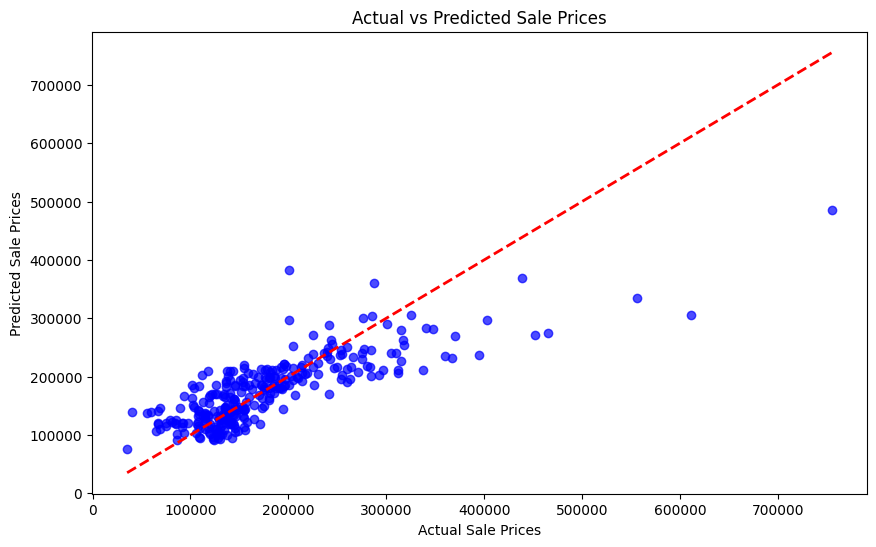

Predicted Prices for new houses:
House 1: Area- 1500 Bedroom- 3 Bathroom- 2
Price:  188364.36129123063
House 1: Area- 2000 Bedroom- 4 Bathroom- 2
Price:  213722.34944002156
House 1: Area- 2500 Bedroom- 4 Bathroom- 3
Price:  295749.82705511036


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab/train.csv")

# Selecting features and target variable
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

# Predicting the prices of new houses based on square footage, number of bedrooms, and number of bathrooms
values = {
    'GrLivArea': [1500, 2000, 2500],
    'BedroomAbvGr': [3, 4, 4],
    'FullBath': [2, 2, 3]
}
new_houses = pd.DataFrame(values)

predicted_prices = model.predict(new_houses)
print("Predicted Prices for new houses:")
for i in range(predicted_prices.size):
  print("House 1: Area-", values['GrLivArea'][i], "Bedroom-", values['BedroomAbvGr'][i],"Bathroom-", values['FullBath'][i])
  print("Price: ", predicted_prices[i])
